In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
UTS, UAS, label = Data = np.loadtxt('ex2data1.txt', delimiter=",", unpack=True)

## Klasifikasi biner pada data

In [3]:
null = (label == 0)

In [4]:
one = (label == 1)

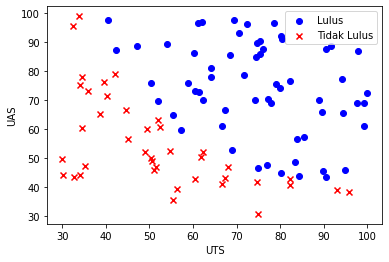

In [5]:
plt.figure()
plt.scatter(UTS[one], UAS[one], c='b', marker='o')
plt.scatter(UTS[null], UAS[null], c='r', marker='x')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend(['Lulus', 'Tidak Lulus'])

In [6]:
y = Data[2,:]
X = np.zeros_like(Data)
X[0,:] = np.ones_like(y)
X[1::] = Data[0:2,:]

In [7]:
n, m = Data.shape


# Fungsi sigmoid dan fungsi objektif pada Klasifikasi Biner

In [8]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [9]:
def cost_function(theta, X, y):
    __,m = X.shape
    hyp = sigmoid(theta@X)
    err = (hyp - y)
    

    grad = (1/m)*(X@err)
    J = (1/m)*((-y @ np.log(hyp) - (1 - y)@np.log(1 - hyp)))

    return J, grad

In [10]:
#theta = np.zeros(3)
theta = np.array([-24, 0.2, 0.2])

In [11]:
JJ, gg = cost_function(theta, X, y)

In [12]:
gg

array([0.04290299, 2.56623412, 2.64679737])

## Kalkulasi gradient

In [13]:
num_iter = 1000
alpha = 0.001

In [14]:
#theta = np.zeros(3)
theta = np.array([-24, 0.2, 0.2])
#theta = np.random.randn(3)
for it in range(num_iter):
    J, grad = cost_function(theta, X,y)
    theta = theta - alpha*grad
    print(' Cost function ', J)

 Cost function  0.2183301938265978
 Cost function  0.2078866823374759
 Cost function  0.20494679512584388
 Cost function  0.20415756304072716
 Cost function  0.20394561003015008
 Cost function  0.20388339185561768
 Cost function  0.2038596928562078
 Cost function  0.20384621370776346
 Cost function  0.20383580905002352
 Cost function  0.20382665855614604
 Cost function  0.20381827510056688
 Cost function  0.20381050598580275
 Cost function  0.20380328388703361
 Cost function  0.2037965647418113
 Cost function  0.203790312165621
 Cost function  0.20378449344488178
 Cost function  0.20377907841768644
 Cost function  0.2037740390815359
 Cost function  0.20376934939008698
 Cost function  0.2037649851044057
 Cost function  0.20376092366465026
 Cost function  0.2037571440731778
 Cost function  0.20375362678636877
 Cost function  0.2037503536140804
 Cost function  0.2037473076260768
 Cost function  0.20374447306492138
 Cost function  0.20374183526487882
 Cost function  0.2037393805764104
 Cos

## Plot hasil klasifikasi

In [15]:
plot_x = np.array([np.min(X[1,:])-2,  np.max(X[1,:])+2])
plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])

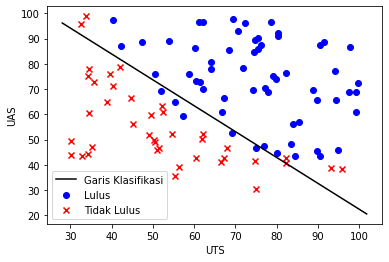

In [16]:
plt.figure()
plt.scatter(UTS[one], UAS[one], c='b', marker='o')
plt.scatter(UTS[null], UAS[null], c='r', marker='x')
plt.plot(plot_x, plot_y, c = 'k')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend(['Garis Klasifikasi','Lulus', 'Tidak Lulus', ])

In [17]:
predict = sigmoid(theta@X)
y_hat = np.zeros_like(predict)
y_hat[np.nonzero((predict >= 0.5))] = 1

In [18]:
accuracy = 1 - np.sum(np.abs(y - y_hat))/len(y)

In [19]:
print('Akurasi dalam persen ', accuracy*100)

Akurasi dalam persen  89.0
